In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel("Sales_Data.xlsx")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


# Agenda & Executive Summary of the data -> Contents of the ppt -> Problem statement -> About Data (Info, Shape, Summary Stats, your assumptions about data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.shape

(2747, 20)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [20]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [22]:
df.duplicated().sum()

0

**Problem Statement**

1. An automobile parts manufacturing company has collected data of transactions for 3 years. 

2. They do not have any in-house data science team, thus they have hired us as their consultant.

3. The need is to use the magical data science skills to provide them with suitable insights about their data and their customers.

**Assumptions:**

1. The data set is having 20 columns and 2747 raws.

2. Data does not have any NULL values nor any duplicate value.

3. 12 categorical fileds present and others are measures and one date value.

4. Outliers might be present by looking into the overall stats.

5. Data has details such as customer demography as well as ordering details.


# Exploratory Analysis and Inferences -> Univariate, Bivariate, and multivariate analysis using data visualization (Weekly, Monthly, Quarterly, Yearly Trends in Sales and Sales Across different Categories of different features in the given data) -> Summarise the inferences

In [24]:
df.head(1)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.7,2,2871.0,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small


# Univariate Analysis

In [31]:
df['PRODUCTCODE'].unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [47]:
df['PRODUCTCODE'].nunique()

109

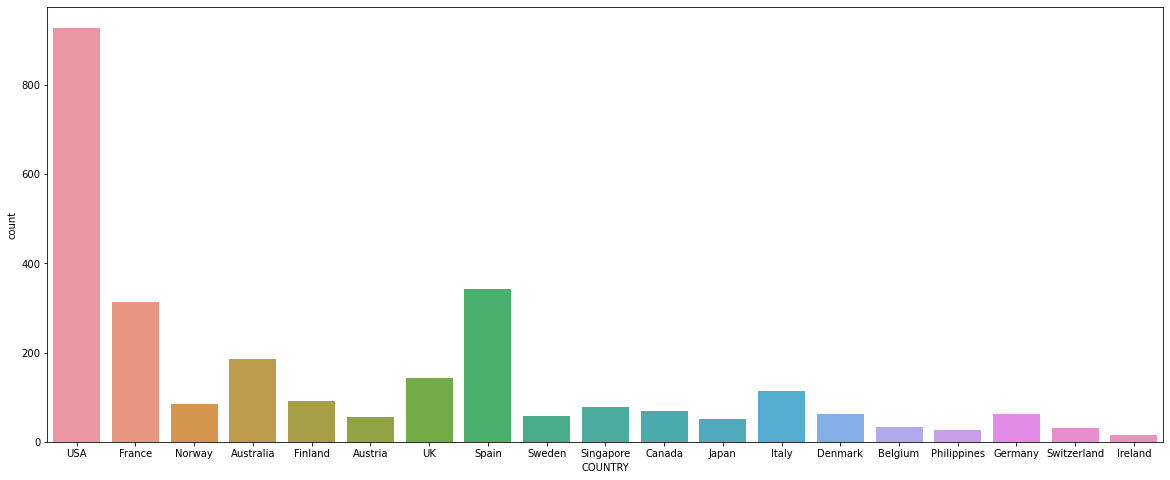

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(x='COUNTRY',data=df)

1. Total 109 product codes are availables

2. Most of the customers ordered from USA country and lowest from Ireland


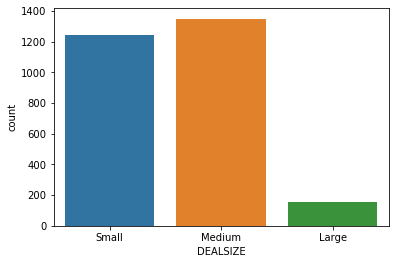

In [3]:
sns.countplot(x='DEALSIZE',data=df)

3  types of deal size available and medium size is more popular whereas large size is less popular

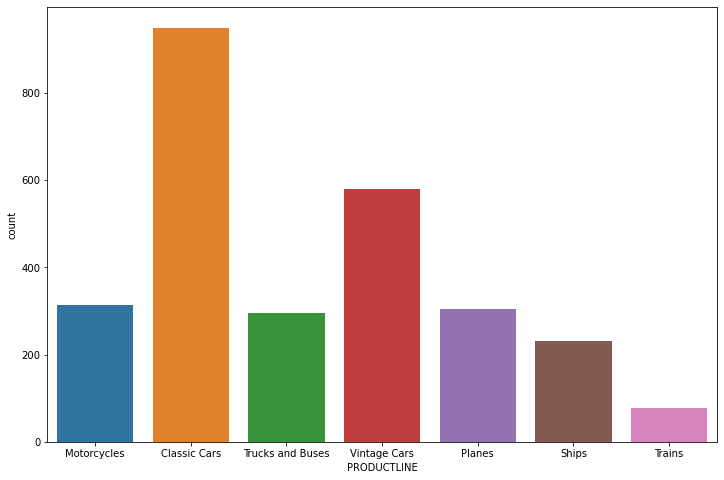

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(x='PRODUCTLINE',data=df)

There are multiple product lines available as above. Classic Car is more preferable whereas Train is the lowest preferable line.

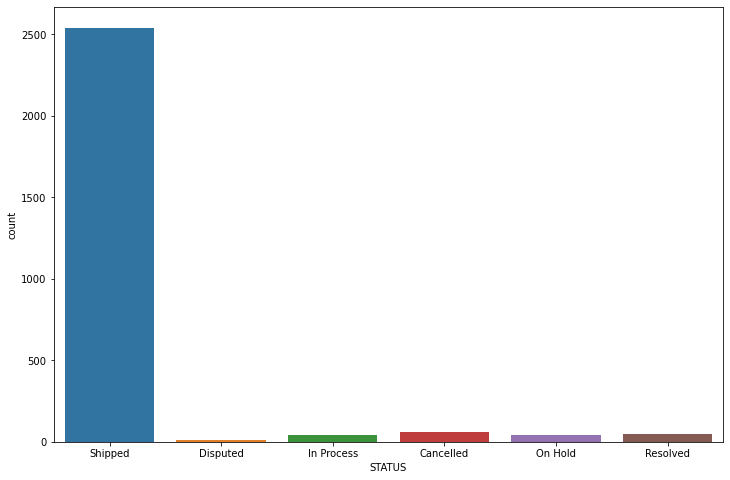

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='STATUS',data=df)

More number of products are already shipped, where as very less no of product which are disrupted due to some reason. 

So the company product shipping activity is faster since last 3 years, if we see overall status

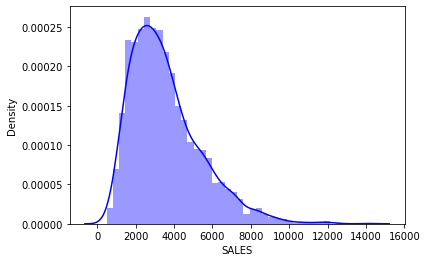

In [4]:
sns.distplot(df['SALES'],color='blue');

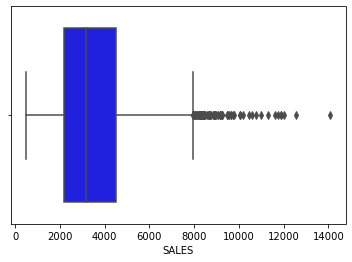

In [5]:
sns.boxplot(x=df['SALES'],data=df,color='blue')

Sales distribution is not normally distributed

Price distribution:

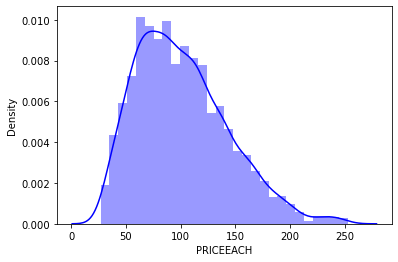

In [7]:
sns.distplot(df['PRICEEACH'],color='blue')

**outlier check in Price**

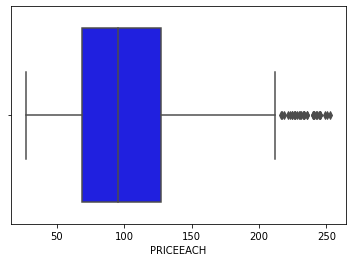

In [3]:
sns.boxplot(x='PRICEEACH',data=df,color='blue')

There is outlier in product price, it means some product is having higher price

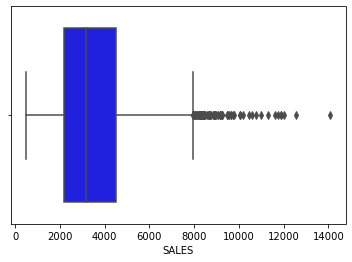

In [4]:
sns.boxplot(x='SALES',data=df,color='blue')

Outlier is present towards maximum side in Sales 

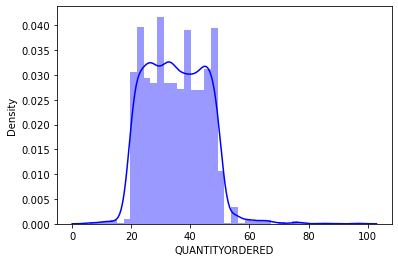

In [5]:
sns.distplot(df['QUANTITYORDERED'],color='blue')

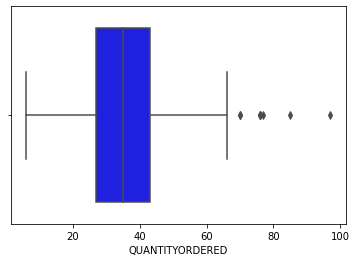

In [6]:
sns.boxplot(x='QUANTITYORDERED',data=df,color='blue')

# Multivariate Analysis

In [5]:
df=df.corr()
analysis = pd.DataFrame(df)

cm = sns.dark_palette("pink", reverse=True,as_cmap=True)

(analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '9pt')]}])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,-0.019853,-0.093563,-0.229640,-0.089038,-0.366620,-0.061617
QUANTITYORDERED,-0.019853,1.000000,-0.000806,-0.286170,0.448956,-0.123264,-0.016025
PRICEEACH,-0.093563,-0.000806,1.000000,-0.351547,0.892637,-0.795533,0.961844
ORDERLINENUMBER,-0.229640,-0.286170,-0.351547,1.000000,-0.444607,0.180793,-0.290236
SALES,-0.089038,0.448956,0.892637,-0.444607,1.000000,-0.761771,0.848200
DAYS_SINCE_LASTORDER,-0.366620,-0.123264,-0.795533,0.180793,-0.761771,1.000000,-0.857988
MSRP,-0.061617,-0.016025,0.961844,-0.290236,0.848200,-0.857988,1.000000


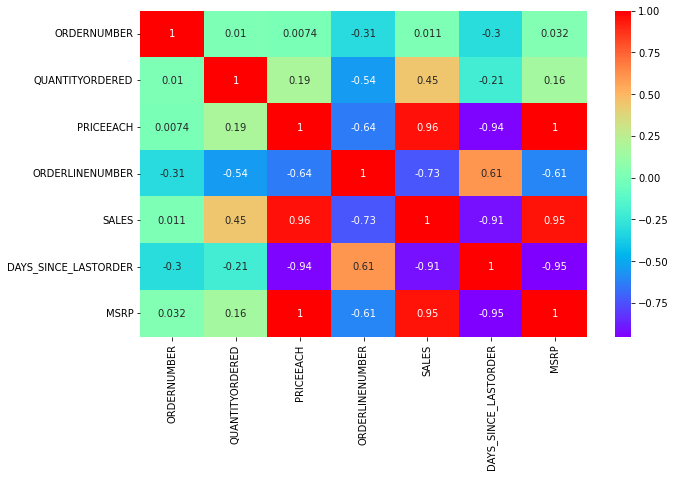

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='rainbow');

1. There is both positive and negative correlations in between variables

2. Correlation is stong because the highest correlation is 0.95 from positive side and -0.95 from negative side

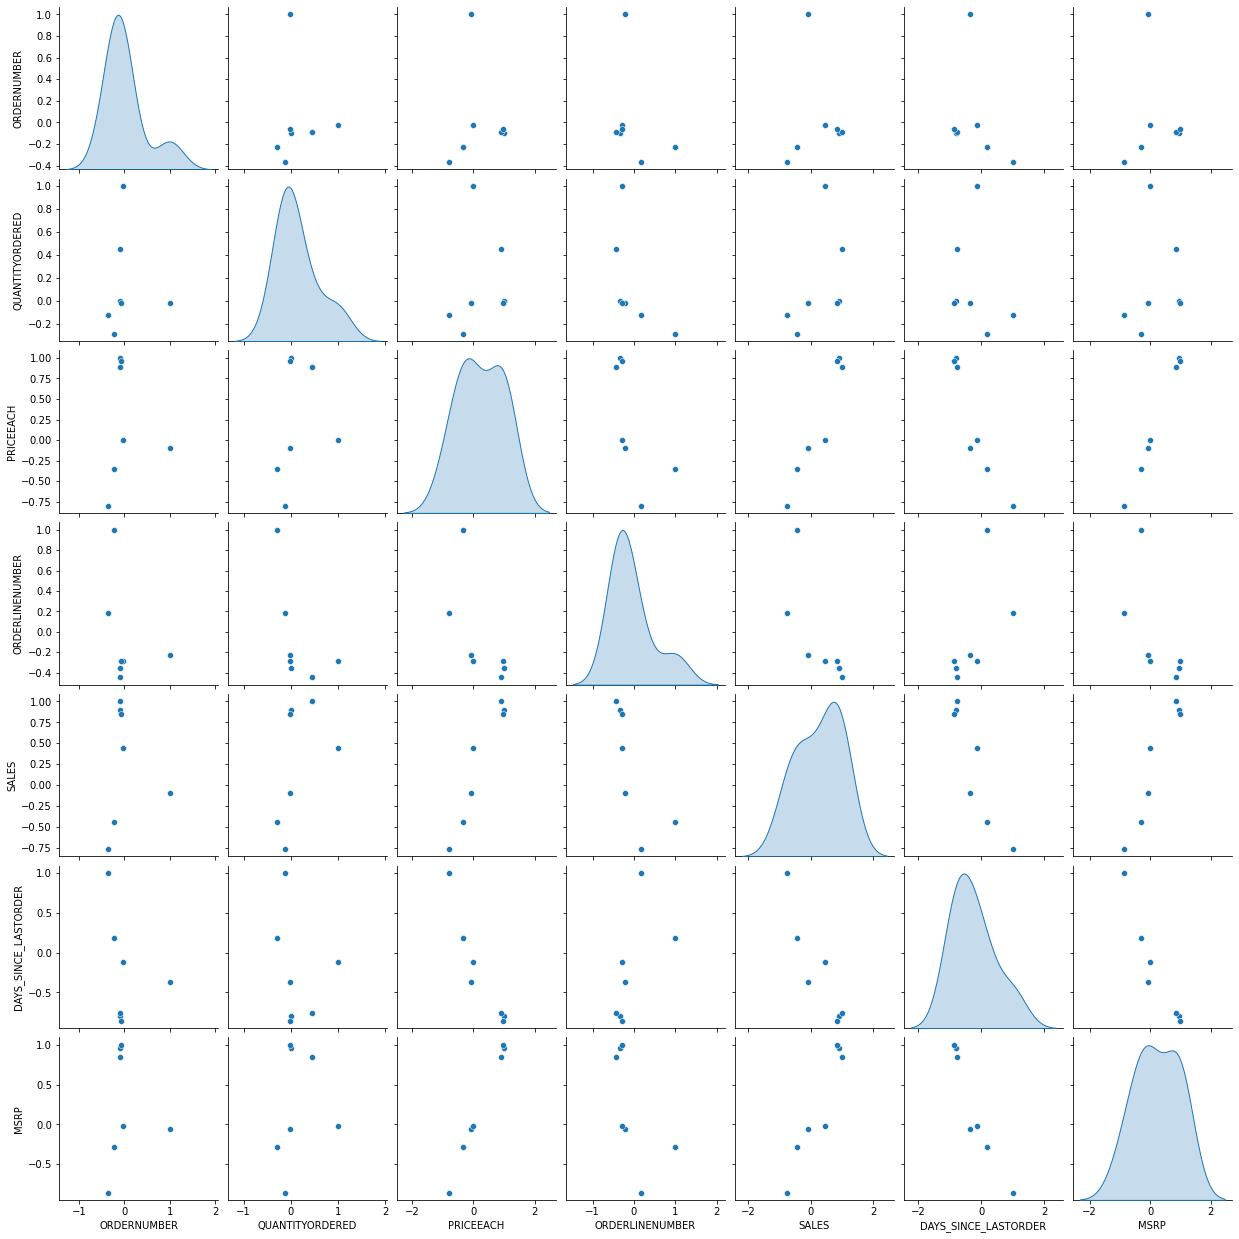

In [7]:
sns.pairplot(df,diag_kind='kde')

1. The correlation is strong in between many variables such as Price each and Sales, MSRP and Sales, Price each and MSRP

# Time Series Creation to Plot Weekly, Monthly, Quarterly, Yearly Trends in Sales interms of Order Date

**Create a DataFrame with Sales and Order Date**

In [8]:
df_ts=df[['ORDERDATE','SALES']].copy()

In [11]:
df_ts.head()

,ORDERDATE,SALES
0,2018-02-24,2871.00
1,2018-05-07,2765.90
2,2018-07-01,3884.34
3,2018-08-25,3746.70
4,2018-10-28,3479.76


In [11]:
df_ts['TimeStamp']=pd.DataFrame(df_ts,columns=['ORDERDATE'])

In [12]:
df_ts.set_index(keys = 'TimeStamp',drop=True,inplace=True)
df_ts.head()

,ORDERDATE,SALES
TimeStamp,,
2018-02-24,2018-02-24,2871.00
2018-05-07,2018-05-07,2765.90
2018-07-01,2018-07-01,3884.34
2018-08-25,2018-08-25,3746.70
2018-10-28,2018-10-28,3479.76


In [13]:
df_ts.drop(labels='ORDERDATE',inplace=True,axis=1)
df_ts.head()

,SALES
TimeStamp,
2018-02-24,2871.00
2018-05-07,2765.90
2018-07-01,3884.34
2018-08-25,3746.70
2018-10-28,3479.76


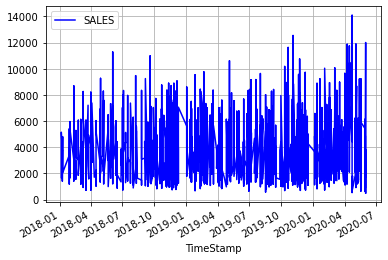

In [14]:
df_ts.plot(color = 'blue');
plt.grid()

**Trend is uniform but sesonality is present**

**Yearly Sales**

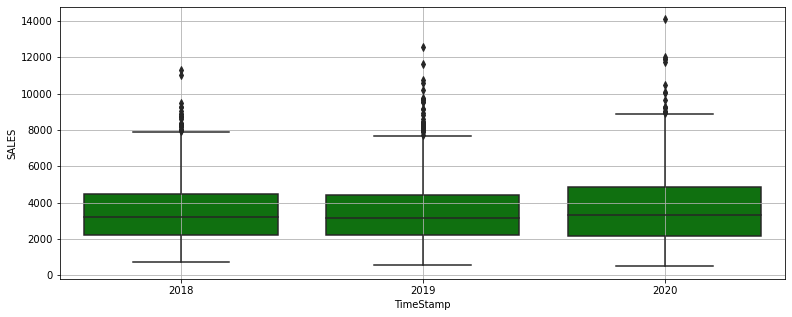

In [15]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df_ts.index.year,y=df_ts['SALES'],data=df_ts,color='green')
plt.grid()
plt.xlabel='Year'
plt.ylabel='Sales Per Year'

In [13]:
yearly_sum=df_ts.resample('A').sum()

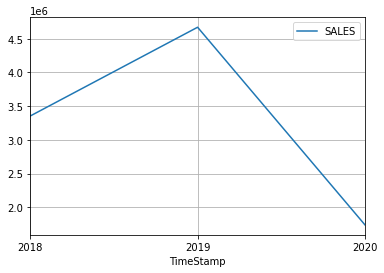

In [14]:
yearly_sum.plot();
plt.grid();
plt.xlabel=('Sum of observation of each month in a year');

More number of sales happened in 2019 if we sumup all the months 

**Monthly Sales**

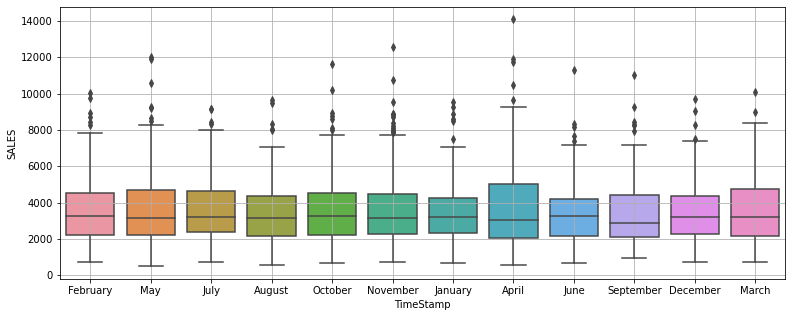

In [15]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df_ts.index.month_name(),y=df_ts['SALES'],data=df_ts)
plt.grid()
plt.xlabel=('Month')
plt.ylabel=('Sales per month')

Outlier is present in all the months

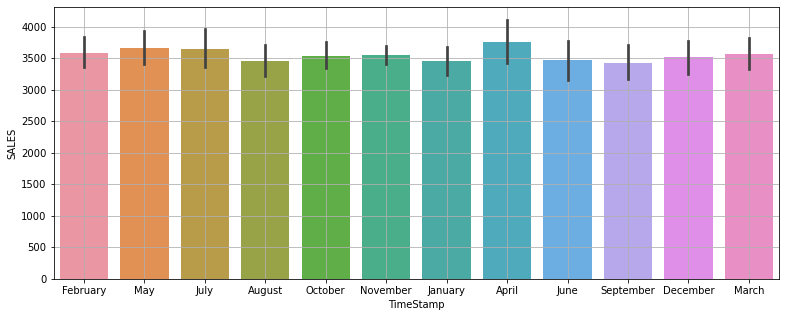

In [16]:
plt.figure(figsize=(13,5))
sns.barplot(x=df_ts.index.month_name(),y=df_ts['SALES'],data=df_ts)
plt.grid()
plt.xlabel=('Month')
plt.ylabel=('Sales')

April month is having more sales

In [16]:
Yearly_sales_acorss_months = pd.pivot_table(df_ts, values = 'SALES',
                                            columns = df_ts.index.year, index= df_ts.index.month_name())

In [17]:
Yearly_sales_acorss_months

TimeStamp,2018,2019,2020
TimeStamp,,,
April,3476.026724,3221.064375,4672.023036
August,3410.505172,3469.934361,NaN
December,3753.088571,3389.115091,NaN
February,3435.029024,3621.157326,3618.840000
January,3327.015385,3526.362651,3429.731515
July,3754.637600,3594.990000,NaN
June,3653.968696,3372.637882,NaN
March,3541.120909,3673.816607,3530.780755
May,3321.950172,3695.113378,3815.508833


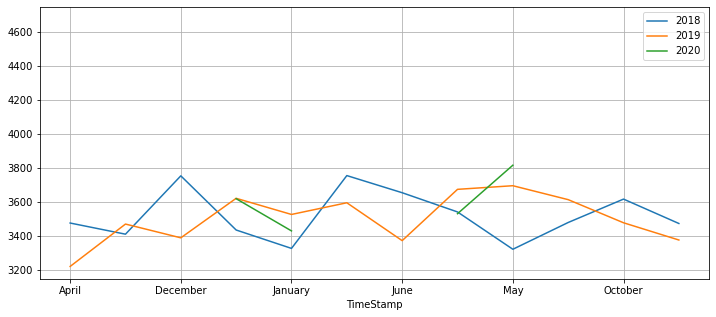

In [18]:
fig,ax = plt.subplots(figsize=(12,5))
Yearly_sales_acorss_months.plot(ax=ax)
plt.grid()
plt.legend(loc='best');

**Quaterly Sales**

In [19]:
quarter_sum=df_ts.resample('Q').sum()

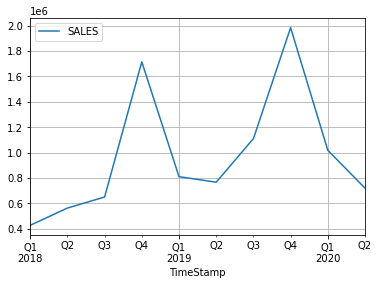

In [20]:
quarter_sum.plot()
plt.grid()
plt.xlabel=('Sum of observations for each month in each quarter')

**Daily Data**

In [21]:
daily_sum = df_ts.resample('D').sum()

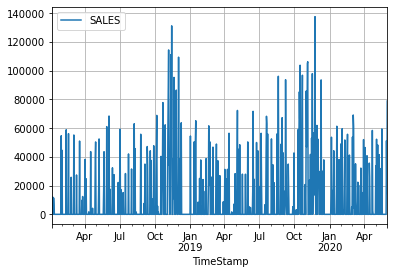

In [22]:
daily_sum.plot()
plt.grid()
plt.xlabel=('Daily Observations')

In [23]:
weekly_sum = df_ts.resample('W').sum()

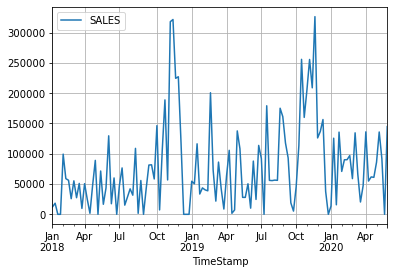

In [24]:
weekly_sum.plot()
plt.grid()

# Customer Segmentation using RFM analysis (4 segments) -> What is RFM? -> What all parameters used and assumptions made?

**What is RFM**

RFM stands for 

R :Recency

F: Frequency

M: Monetary

It is basically a Marketting Analysis method which is used to identify the best customers based on their nature of spending habits.

Overall, its a customer behaviour segmentation technique such as when was the last purchase, frequency of purchasing and how much they spend

A customer having highest in each of the criteria is a best RFM score.

RFM helps to manage the advertising and promotional budgets carefully. Also it helps the company to divide the customers based on their behaviour which is easy to apply discount/promotions or advertising accordingly with respect to the groups


In [26]:
from datetime import datetime
now=datetime.now()

**Recency**

In [27]:
df_recency=df.groupby(by='CUSTOMERNAME',as_index=False)['ORDERDATE'].max()
df_recency

,CUSTOMERNAME,ORDERDATE
0,"AV Stores, Co.",2019-11-17
1,Alpha Cognac,2020-03-28
2,Amica Models & Co.,2019-09-09
3,"Anna's Decorations, Ltd",2020-03-09
4,Atelier graphique,2019-11-25
...,...,...
84,"Vida Sport, Ltd",2019-08-30
85,Vitachrome Inc.,2019-11-05
86,"Volvo Model Replicas, Co",2019-11-19
87,West Coast Collectables Co.,2019-01-29


In [28]:
df_recency.columns = ['CUSTOMERNAME','MAX_DATE']

In [29]:
df_recency['RECENCY'] = df_recency['MAX_DATE'].apply(lambda x:now-x)
df_recency

,CUSTOMERNAME,MAX_DATE,RECENCY
0,"AV Stores, Co.",2019-11-17,851 days 12:31:32.274760
1,Alpha Cognac,2020-03-28,719 days 12:31:32.274760
2,Amica Models & Co.,2019-09-09,920 days 12:31:32.274760
3,"Anna's Decorations, Ltd",2020-03-09,738 days 12:31:32.274760
4,Atelier graphique,2019-11-25,843 days 12:31:32.274760
...,...,...,...
84,"Vida Sport, Ltd",2019-08-30,930 days 12:31:32.274760
85,Vitachrome Inc.,2019-11-05,863 days 12:31:32.274760
86,"Volvo Model Replicas, Co",2019-11-19,849 days 12:31:32.274760
87,West Coast Collectables Co.,2019-01-29,1143 days 12:31:32.274760


In [30]:
df_recency['RECENCY']= df_recency['RECENCY'].apply(lambda x:x.days)

In [31]:
df_recency.drop('MAX_DATE',inplace=True,axis=1)

In [32]:
df_recency

,CUSTOMERNAME,RECENCY
0,"AV Stores, Co.",851
1,Alpha Cognac,719
2,Amica Models & Co.,920
3,"Anna's Decorations, Ltd",738
4,Atelier graphique,843
...,...,...
84,"Vida Sport, Ltd",930
85,Vitachrome Inc.,863
86,"Volvo Model Replicas, Co",849
87,West Coast Collectables Co.,1143


In [10]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CUSTOMERNAME  89 non-null     object
 1   RECENCY       89 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


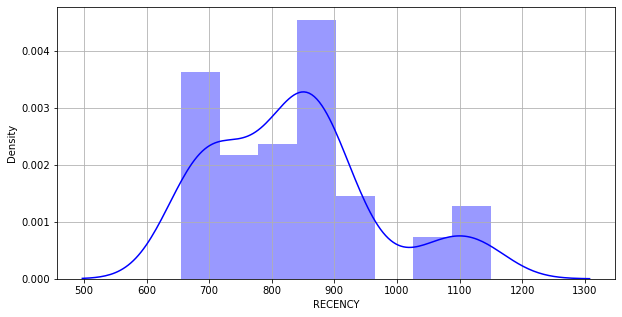

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df_recency['RECENCY'],color='blue');
plt.grid()

**Frequency**

In [35]:
df_frequency = df.groupby(by='CUSTOMERNAME',as_index=False)['ORDERNUMBER'].count()
df_frequency

,CUSTOMERNAME,ORDERNUMBER
0,"AV Stores, Co.",51
1,Alpha Cognac,20
2,Amica Models & Co.,26
3,"Anna's Decorations, Ltd",46
4,Atelier graphique,7
...,...,...
84,"Vida Sport, Ltd",31
85,Vitachrome Inc.,25
86,"Volvo Model Replicas, Co",19
87,West Coast Collectables Co.,13


In [36]:
df_frequency.columns = ['CUSTOMERNAME','FREQUENCY']

In [37]:
df_frequency

,CUSTOMERNAME,FREQUENCY
0,"AV Stores, Co.",51
1,Alpha Cognac,20
2,Amica Models & Co.,26
3,"Anna's Decorations, Ltd",46
4,Atelier graphique,7
...,...,...
84,"Vida Sport, Ltd",31
85,Vitachrome Inc.,25
86,"Volvo Model Replicas, Co",19
87,West Coast Collectables Co.,13


In [18]:
df_frequency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CUSTOMERNAME  89 non-null     object
 1   FREQUENCY     89 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


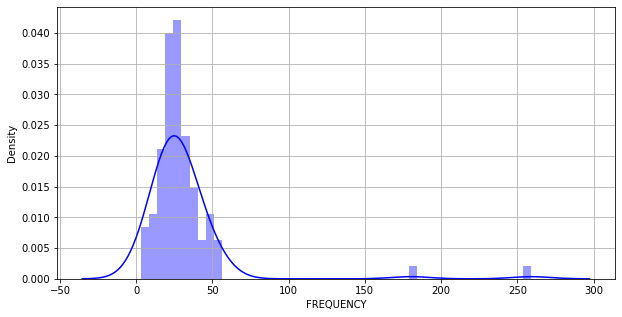

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(df_frequency['FREQUENCY'],color='blue');
plt.grid()

**Monetary**

In [39]:
df_monetary = df.groupby(by='CUSTOMERNAME',as_index=False)['PRICEEACH'].sum()

In [70]:
#df_monetary1['CUSTOMERNAME']=df['CUSTOMERNAME'].copy()
#df_monetary1['total_money']=(df['PRICEEACH'] * df['QUANTITYORDERED'])
#df_monetary=df_monetary1.groupby(by='CUSTOMERNAME',as_index=False) .agg({'total_money': 'sum'})

In [40]:
df_monetary.columns = ['CUSTOMERNAME','MONETARY']

In [41]:
df_monetary

,CUSTOMERNAME,MONETARY
0,"AV Stores, Co.",4645.31
1,Alpha Cognac,2023.20
2,Amica Models & Co.,2882.17
3,"Anna's Decorations, Ltd",4895.51
4,Atelier graphique,645.67
...,...,...
84,"Vida Sport, Ltd",3474.33
85,Vitachrome Inc.,2654.47
86,"Volvo Model Replicas, Co",2266.49
87,West Coast Collectables Co.,1148.00


In [42]:
df_monetary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUSTOMERNAME  89 non-null     object 
 1   MONETARY      89 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


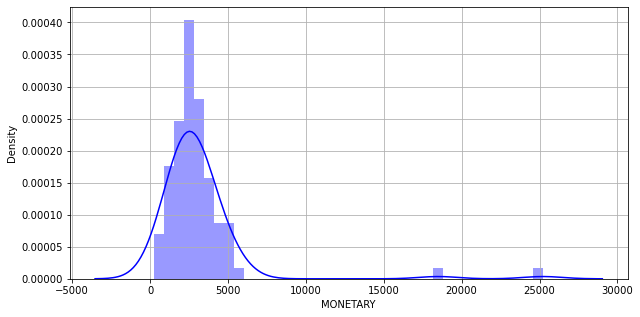

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df_monetary['MONETARY'],color='blue')
plt.grid();

In [44]:
rfm=df_recency.merge(df_frequency,on='CUSTOMERNAME')

In [45]:
rfm_1=rfm.merge(df_monetary,on='CUSTOMERNAME')

In [46]:
rfm_1.head()

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY
0,"AV Stores, Co.",851,51,4645.31
1,Alpha Cognac,719,20,2023.20
2,Amica Models & Co.,920,26,2882.17
3,"Anna's Decorations, Ltd",738,46,4895.51
4,Atelier graphique,843,7,645.67


In [48]:
rfm_1.to_excel(r'C:\Users\jpradhan\Downloads\MRA_Milestone1\RFM.xlsx', index = False)

In [49]:
rfm_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUSTOMERNAME  89 non-null     object 
 1   RECENCY       89 non-null     int64  
 2   FREQUENCY     89 non-null     int64  
 3   MONETARY      89 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


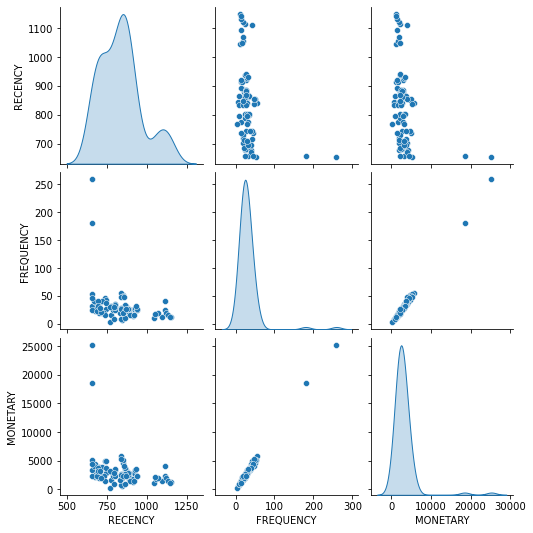

In [50]:
sns.pairplot(rfm_1,diag_kind='kde')

**Customer Segmentation**

In [51]:
from crm_rfm_modeling import rfm
from crm_rfm_modeling.rfm import RFM

In [66]:
model = rfm_1.quantile(q=[0.25,0.5,0.75])

In [53]:
model

,RECENCY,FREQUENCY,MONETARY
0.25,730.0,20.0,1998.28
0.50,839.0,26.0,2521.83
0.75,885.0,32.0,3441.34


In [31]:
#df_1=rfm_1[['RECENCY','FREQUENCY','MONETARY']]

In [32]:
#df_1.columns=['recency','frequency','monetary']

In [68]:
model.to_dict()

{'FREQUENCY': {0.25: 20.0, 0.5: 26.0, 0.75: 32.0},
 'Frequency_Quartile': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'MONETARY': {0.25: 1998.2800000000002,
  0.5: 2521.8299999999995,
  0.75: 3441.34},
 'Monetary_Quartile': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'RECENCY': {0.25: 730.0, 0.5: 839.0, 0.75: 885.0},
 'Recency_Quartile': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0}}

In [40]:
#model.summary_statistics()

In [42]:
#df_fitted=model.fitted_data
#df_fitted.head()

In [69]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [70]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [71]:
rfm_seg = rfm_1
rfm_seg['Recency_Quartile'] = rfm_seg['RECENCY'].apply(RScore, args=('RECENCY',model,))
rfm_seg['Frequency_Quartile'] = rfm_seg['FREQUENCY'].apply(FMScore, args=('FREQUENCY',model,))
rfm_seg['Monetary_Quartile'] = rfm_seg['MONETARY'].apply(FMScore, args=('MONETARY',model,))

In [72]:
rfm_seg.head()

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
0,"AV Stores, Co.",851,51,4645.31,2,4,4,244
1,Alpha Cognac,719,20,2023.20,4,1,2,412
2,Amica Models & Co.,920,26,2882.17,1,2,3,123
3,"Anna's Decorations, Ltd",738,46,4895.51,3,4,4,344
4,Atelier graphique,843,7,645.67,2,1,1,211


In [73]:
rfm_seg['RFMScore'] = rfm_seg.Recency_Quartile.map(str) \
                            + rfm_seg.Frequency_Quartile.map(str) \
                            + rfm_seg.Monetary_Quartile.map(str)
rfm_seg.head()

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
0,"AV Stores, Co.",851,51,4645.31,2,4,4,244
1,Alpha Cognac,719,20,2023.20,4,1,2,412
2,Amica Models & Co.,920,26,2882.17,1,2,3,123
3,"Anna's Decorations, Ltd",738,46,4895.51,3,4,4,344
4,Atelier graphique,843,7,645.67,2,1,1,211


In [60]:
rfm_seg.to_excel(r'C:\Users\jpradhan\Downloads\MRA_Milestone1\RFM_Final.xlsx', index = False)

# Inferences from RFM Analysis and identified segments -> Who are your best customers? (give at least 5) -> Which customers are on the verge of churning? (give at least 5) -> Who are your lost customers? (give at least 5) -> Who are your loyal customers? (give at least 5)

**Best Customers**

In [74]:
rfm_seg.sort_values(['Recency_Quartile','Frequency_Quartile','Monetary_Quartile'],ascending=[False,False,False]).head(5)

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
26,Danish Wholesale Imports,701,36,3889.360000,4,4,4,444
32,Euro Shopping Channel,655,259,25222.250000,4,4,4,444
41,L'ordine Souveniers,676,39,4334.750000,4,4,4,444
43,La Rochelle Gifts,655,53,5143.459070,4,4,4,444
53,Mini Gifts Distributors Ltd.,657,180,18485.340417,4,4,4,444


**Loyal Customer**

In [75]:
rfm_seg[rfm_seg['Frequency_Quartile']==4].head()

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
0,"AV Stores, Co.",851,51,4645.31,2,4,4,244
3,"Anna's Decorations, Ltd",738,46,4895.51,3,4,4,344
6,"Australian Collectors, Co.",839,55,5752.46,3,4,4,344
26,Danish Wholesale Imports,701,36,3889.36,4,4,4,444
30,"Dragon Souveniers, Ltd.",745,43,4863.54,3,4,4,344


**Lost Customers**

In [76]:
rfm_seg[rfm_seg['RFMScore']=='144']

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
68,"Saveley & Henriot, Co.",1111,41,4122.47,1,4,4,144


In [77]:
rfm_seg[rfm_seg['RFMScore']=='111'].head()

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
8,Auto Assoc. & Cie.,888,18,1790.780426,1,1,1,111
12,"Bavarian Collectables Imports, Co.",914,14,1180.050000,1,1,1,111
15,CAF Imports,1094,13,1364.520000,1,1,1,111
16,Cambridge Collectables Co.,1044,11,1114.620000,1,1,1,111
20,"Clover Collections, Co.",913,16,1805.920000,1,1,1,111


**Churning Customers**

In [78]:
rfm_seg[rfm_seg['RFMScore']=='244'].head()

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
0,"AV Stores, Co.",851,51,4645.31,2,4,4,244
44,Land of Toys Inc.,853,49,5101.91,2,4,4,244
57,Online Diecast Creations Co.,864,34,3682.27,2,4,4,244
64,Rovelli Gifts,856,48,4112.51,2,4,4,244


**Most spent Customer**

In [79]:
rfm_seg[rfm_seg['Monetary_Quartile']==4]

,CUSTOMERNAME,RECENCY,FREQUENCY,MONETARY,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFMScore
0,"AV Stores, Co.",851,51,4645.310000,2,4,4,244
3,"Anna's Decorations, Ltd",738,46,4895.510000,3,4,4,344
6,"Australian Collectors, Co.",839,55,5752.460000,3,4,4,344
11,Baane Mini Imports,863,32,3474.360000,2,3,4,234
26,Danish Wholesale Imports,701,36,3889.360000,4,4,4,444
30,"Dragon Souveniers, Ltd.",745,43,4863.540000,3,4,4,344
32,Euro Shopping Channel,655,259,25222.250000,4,4,4,444
41,L'ordine Souveniers,676,39,4334.750000,4,4,4,444
43,La Rochelle Gifts,655,53,5143.459070,4,4,4,444
44,Land of Toys Inc.,853,49,5101.910000,2,4,4,244
